In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#합치기
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### log 취해서 정규화시키기

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

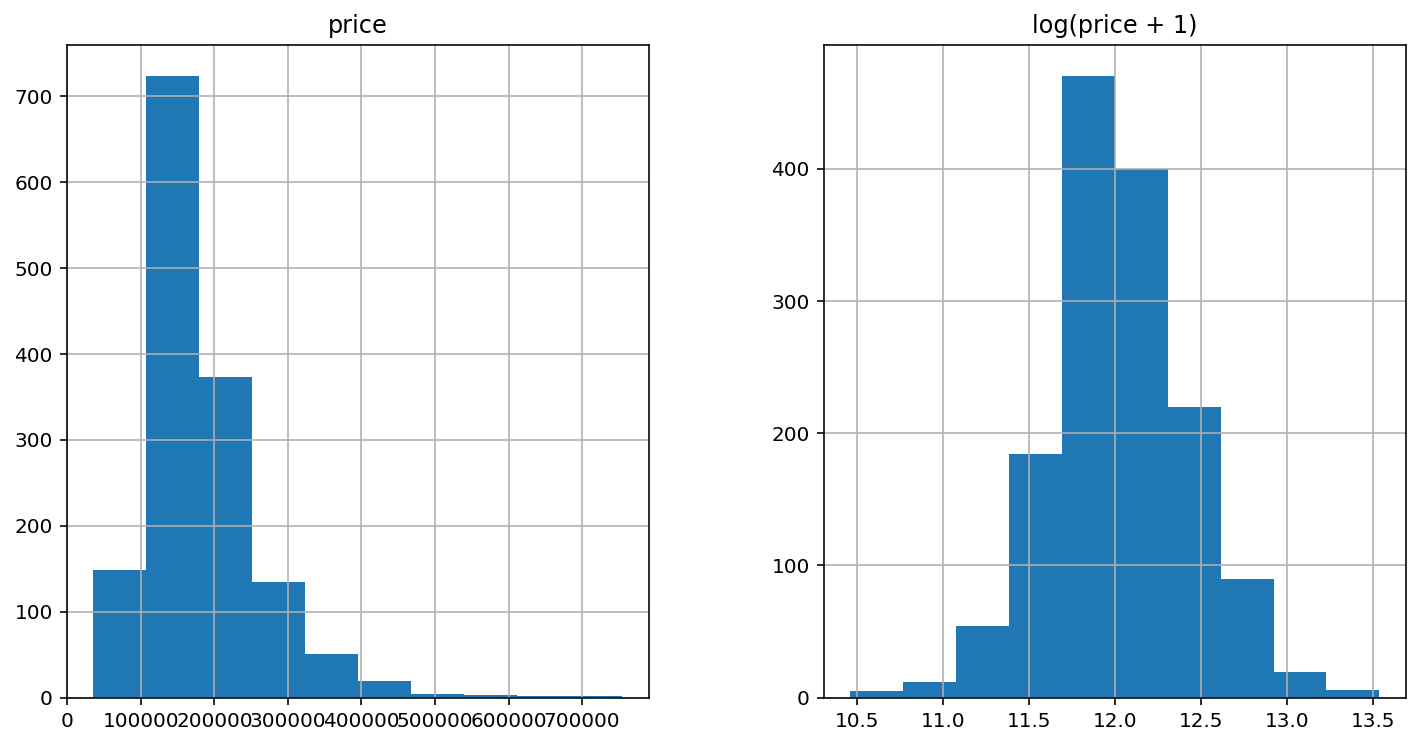

In [7]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [8]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [13]:
# 타입 알아보기
all_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [10]:
# object아닌 것 
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [16]:
# 각 데이터의 비대칭도를 알려고 
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: float64

In [17]:
# 비대칭도가 왼쪽으로 0.75 치우친 값 만
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [20]:
# 왼쪽으로 0.75 치우친 값만 log를 취해준다. 
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.631370,1.646667,2.306780,7,5,2003,2003,1.837880,2.023008,0.0,...,0,0,0,1,0,0,0,0,1,0
1,1.397363,1.685370,2.319405,6,8,1976,1976,0.000000,2.065156,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1.631370,1.655196,2.334879,7,5,2001,2002,1.807264,1.972450,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1.660640,1.631370,2.318892,7,5,1915,1970,0.000000,1.853152,0.0,...,0,0,0,1,1,0,0,0,0,0
4,1.631370,1.694266,2.357574,8,5,2000,2000,1.925822,2.013056,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.805236,1.408800,2.148139,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,1.805236,1.408800,2.145577,4,5,1970,1970,0.000000,1.876926,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,1.397363,1.805236,2.389087,5,7,1960,1996,0.000000,2.093184,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,1.696413,1.637663,2.327628,5,5,1992,1992,0.000000,1.920306,0.0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
# 결측값 제외하고 더미값으로 만들어짐 - object
all_data = pd.get_dummies(all_data)
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.631370,1.646667,2.306780,7,5,2003,2003,1.837880,2.023008,0.0,...,0,0,0,1,0,0,0,0,1,0
1,1.397363,1.685370,2.319405,6,8,1976,1976,0.000000,2.065156,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1.631370,1.655196,2.334879,7,5,2001,2002,1.807264,1.972450,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1.660640,1.631370,2.318892,7,5,1915,1970,0.000000,1.853152,0.0,...,0,0,0,1,1,0,0,0,0,0
4,1.631370,1.694266,2.357574,8,5,2000,2000,1.925822,2.013056,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.805236,1.408800,2.148139,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,1.805236,1.408800,2.145577,4,5,1970,1970,0.000000,1.876926,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,1.397363,1.805236,2.389087,5,7,1960,1996,0.000000,2.093184,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,1.696413,1.637663,2.327628,5,5,1992,1992,0.000000,1.920306,0.0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# 결측값 평균값으로 대체
all_data = all_data.fillna(all_data.mean())

In [23]:
train.shape[0]

1460

In [24]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

# Models
+ L1, L2 정규화 시도
+ 교차 검증 RMSE로 모델 평가

In [25]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [26]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

### Ridge 모델

In [27]:
# Ridge를 이용함
model_ridge = Ridge()

In [28]:
# 모델의 유연성 체크 
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge

[0.13971585902547978,
 0.13873356502850626,
 0.13753576060031988,
 0.1379111771684858,
 0.13856854611713448,
 0.13868733333648603,
 0.13888769211816293,
 0.13917055929911482,
 0.14020850343736557,
 0.14156870551635772,
 0.14306082626623476]

Text(0, 0.5, 'rmse')

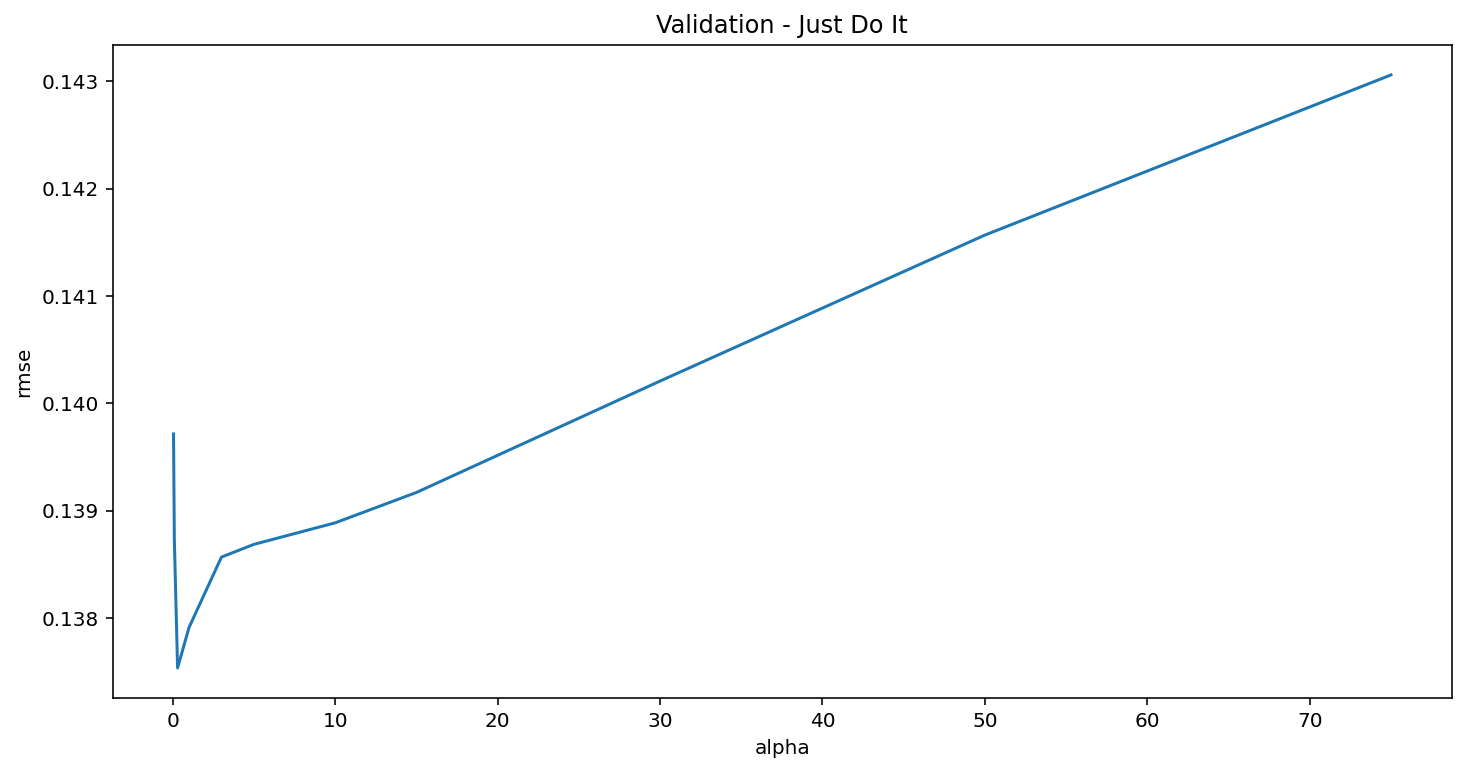

In [29]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

+ 알파가 너무 크면, 정규화 너무 강함
+ 작은 값으로만 주면 오버핏 됨

In [30]:
cv_ridge.min()

0.13753576060031988

### Lasso모델

In [32]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
model_lasso

LassoCV(alphas=[1, 0.1, 0.001, 0.0005])

In [33]:
rmse_cv(model_lasso).mean()

0.12801415851266737

+ ridge 모델보다 rmse 값이 낮으니깐, 이걸로 선택

In [35]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
coef

MSSubClass              -0.000000
LotFrontage              0.000000
LotArea                  0.345660
OverallQual              0.062618
OverallCond              0.037799
                           ...   
SaleCondition_AdjLand    0.000000
SaleCondition_Alloca     0.000000
SaleCondition_Family    -0.005861
SaleCondition_Normal     0.022000
SaleCondition_Partial    0.000000
Length: 288, dtype: float64

In [36]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 110 variables and eliminated the other 178 variables


In [38]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
imp_coef

RoofMatl_ClyTile        -0.562910
MSZoning_C (all)        -0.304093
Condition2_PosN         -0.120047
CentralAir_N            -0.050618
Neighborhood_Edwards    -0.049474
Functional_Maj2         -0.048476
MSZoning_RM             -0.045116
SaleCondition_Abnorml   -0.042357
SaleType_WD             -0.032735
Neighborhood_MeadowV    -0.030026
OverallQual              0.062618
Neighborhood_NridgHt     0.072061
Exterior1st_BrkFace      0.080610
RoofMatl_WdShngl         0.081297
Neighborhood_NoRidge     0.115988
Neighborhood_Crawfor     0.118454
Neighborhood_StoneBr     0.123679
LotArea                  0.345660
1stFlrSF                 0.369432
GrLivArea                1.080819
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

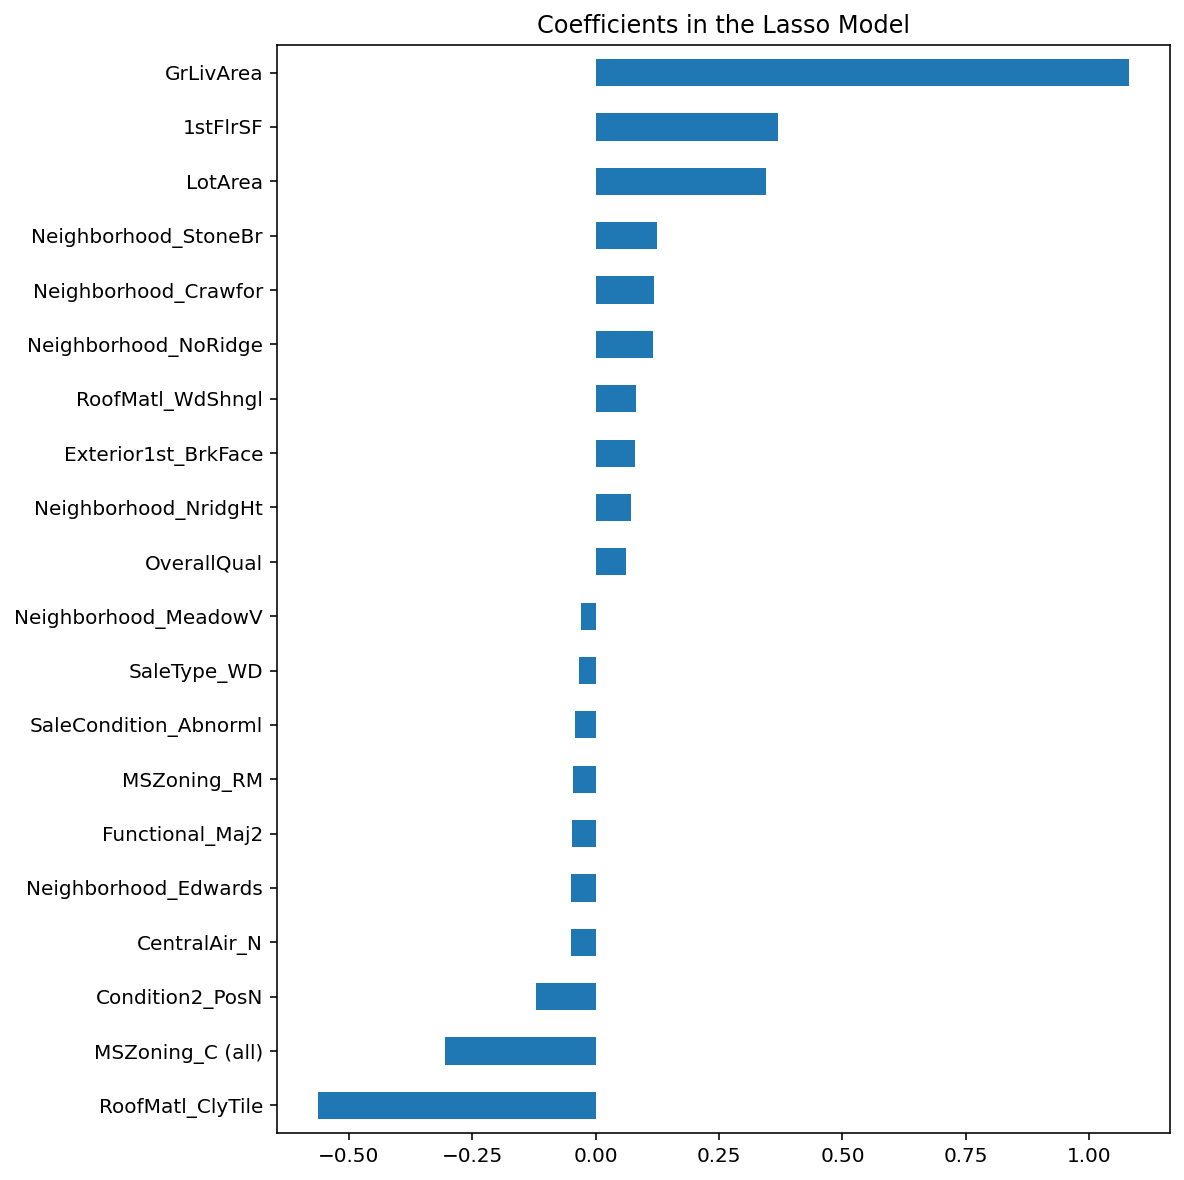

In [39]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

+ GrLivArea 좋게 나옴

<AxesSubplot:xlabel='preds', ylabel='residuals'>

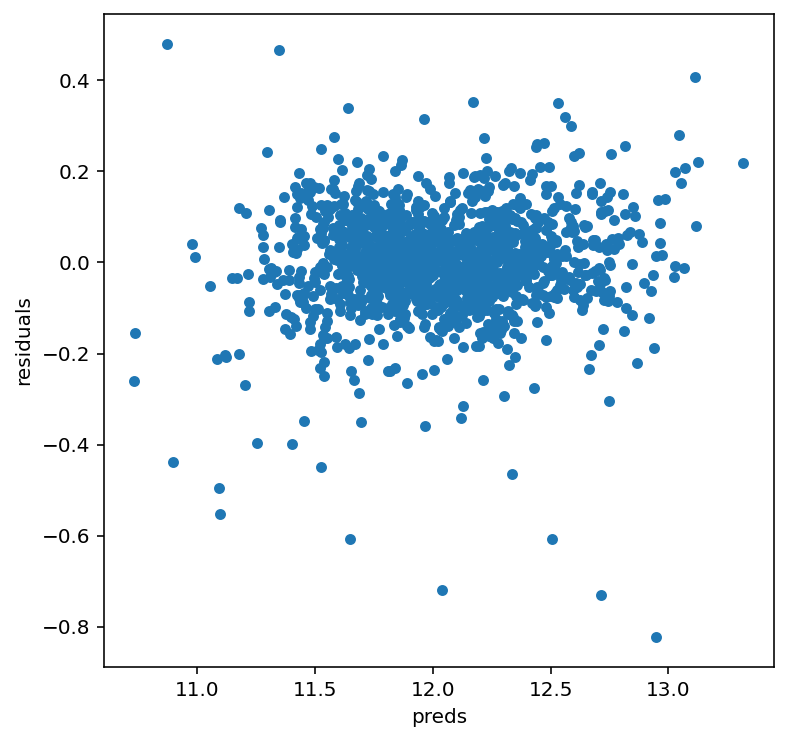

In [40]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [41]:
preds

,preds,true,residuals
0,12.270865,12.247699,-0.023166
1,12.162470,12.109016,-0.053453
2,12.286863,12.317171,0.030308
3,12.061873,11.849405,-0.212468
4,12.663646,12.429220,-0.234426
...,...,...,...
1455,12.072077,12.072547,0.000470
1456,12.185345,12.254868,0.069523
1457,12.422010,12.493133,0.071123
1458,11.806304,11.864469,0.058166


# xgboost model

In [46]:
import xgboost as xgb

In [48]:
# DMatrix : 전용 데이터 셋
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

+ max_depth : 깊이라고 생각, 
    + 높으면 특정 피쳐 조건에 특화됨 (과적합)
+ eta : 학습률과 같은 파라미터
    + 0~1 사이 값


+ cv : 최적의 파라미터 구할 수 있는 api
+ num_boost_round : 결정 트리의 갯수 지정
+ early_stopping_rounds : 예측 오류가 더이상 개선 안 되면 반복 끝까지 수행하지 않고 중지


<AxesSubplot:>

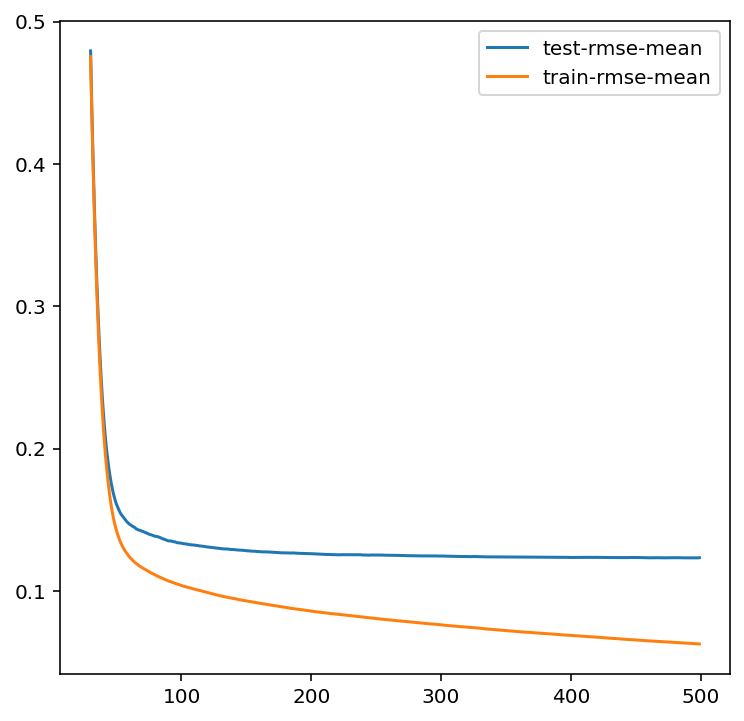

In [49]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [50]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=360, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

+ eta -> learning_rate
+ n_extimators : 생성될 트리의 개수

In [51]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

+ expm1 :  e^x

In [52]:
xgb_preds

array([119024.81 , 156446.97 , 186084.17 , ..., 154621.8  , 119180.875,
       229370.6  ], dtype=float32)

In [53]:
lasso_preds

array([124050.21224198, 147838.91835935, 169930.55046402, ...,
       161061.4364384 , 118391.1783197 , 233143.09829578])

<AxesSubplot:xlabel='xgb', ylabel='lasso'>

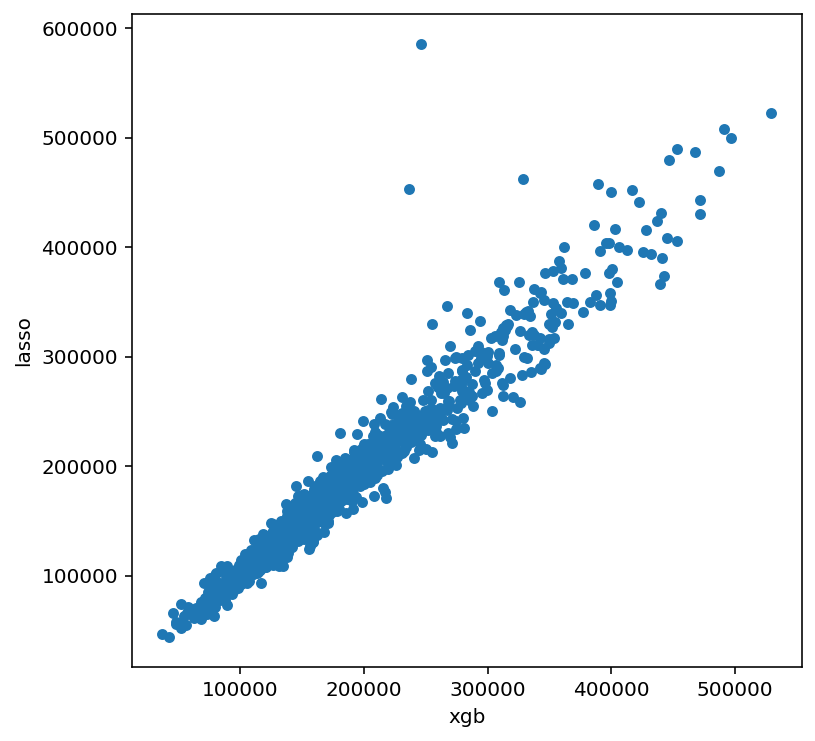

In [54]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [55]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [56]:
preds

array([122542.59388189, 150421.33660154, 174776.63923107, ...,
       159129.54456938, 118628.09044879, 232011.34849455])

In [57]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)